In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_excel('/content/PROJECT DATASET.xlsx',names=['text','label'])

In [ ]:
df

,text,label
0,రమేష్ రాజేష్ కి పక్కలో బెల్లంలా ఉన్నాడు,Idiom
1,రాజేష్ మాటలే కానీ చేతలు లేదు తెలిసిందే కదా మొర...,Literal
2,సెగలేనిదే పొగ రాదన్నట్లు రవి ఎవరు చెప్పకుండా ఏ...,Literal
3,మళ్లీ మళ్లీ రిపీట్ చేస్తూ చూస్తున్న వాళ్ళు ఎంత...,Literal
4,పొయ్యి కనీసం కొడుకులకు పని పాట లేదు కా బట్టి ద...,Literal
...,...,...
595,తెలుగు సినిమా నీ ఉంకో మెట్టు ఎక్కించే సినిమా అ...,Literal
596,ఆకలి మీద ఉన్న ఆ వ్యక్తి అంబలి తాగుతుండగా అతడి ...,Idiom
597,వాడితో ఎందుకురా వాడి పుటకో మాట చెప్పేవాడు,Idiom
598,రాజేష్ ఎంత బాధ అయినా తట్టుకోగలడు తెలిసిందే కదా...,Literal


In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df["label_int"] = le.fit_transform(df['label'])
df.head()

,text,label,label_int
0,రమేష్ రాజేష్ కి పక్కలో బెల్లంలా ఉన్నాడు,Idiom,0
1,రాజేష్ మాటలే కానీ చేతలు లేదు తెలిసిందే కదా మొర...,Literal,1
2,సెగలేనిదే పొగ రాదన్నట్లు రవి ఎవరు చెప్పకుండా ఏ...,Literal,1
3,మళ్లీ మళ్లీ రిపీట్ చేస్తూ చూస్తున్న వాళ్ళు ఎంత...,Literal,1
4,పొయ్యి కనీసం కొడుకులకు పని పాట లేదు కా బట్టి ద...,Literal,1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
df_train.head()

,text,label,label_int
28,మళ్లీ మళ్లీ రిపీట్ చేస్తూ చూస్తున్న వాళ్ళు ఎంత...,Literal,1
49,ప్రమిదలో దీపం వెలుగుతున్నప్పుడు గాలి తాకిడికి ...,Idiom,0
13,స్టార్ హీరోస్ లో ఒకడిగా నిలిచినా కళ్యాణ్ రామ్ ...,Literal,1
109,అసమానత్వం వల్ల హింస పెరుగుతుంది,Literal,1
113,చంద్రబాబు గారు సీఎంగా గజ్జ కట్టారు,Idiom,0


In [ ]:
df_test.head()

,text,label,label_int
201,సినిమా అంటే ఇది కదా..అందరు కోరుకునేది ఇలా ఉండా...,Literal,1
270,️ ఈ సినిమా చాలా బాగా సక్సెస్ కావాలని కోరుకుంట...,Literal,1
239,ఈ సినిమా పెద్ద హిట్ అవ్వాలని కోరుకుంటున్నాను ...,Literal,1
342,గాజు బొమ్మ కిందపడింది తునా తునకలైంది,Idiom,0
512,ఈ రోజే సినిమా చూసి వచ్చి ట్రైలర్ చూస్తున్నాసిన...,Literal,1


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Split the dataset into train and test sets
train_data = df_train.iloc[:,[0,2]]
test_data = df_test.iloc[:,[0,2]]

# Create a bag of words representation of the text
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(train_data['text'])
test_bow = vectorizer.transform(test_data['text'])
# Train the model
model = MultinomialNB()
model.fit(train_bow, train_data['label_int'])

# Predict on the test set
predicted3 = model.predict(test_bow)

# Evaluate the model
accuracy = (predicted3 == test_data['label_int']).mean()
print("Accuracy for naive bayes is ", accuracy)


Accuracy for naive bayes is  0.7666666666666667


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
model = LogisticRegression()
model.fit(train_bow, train_data['label_int'])

# Predict on the test set
predicted1 = model.predict(test_bow)
# Evaluate the model
accuracy = (predicted1 == test_data['label_int']).mean()
print("Accuracy for logistic regression is", accuracy)

Accuracy for logistic regression is 0.8


In [ ]:
model = SVC()
model.fit(train_bow, train_data['label_int'])

# Predict on the test set
predicted2 = model.predict(test_bow)

# Evaluate the model
accuracy = (predicted2 == test_data['label_int']).mean()
print("Accuracy for svc is ", accuracy)

Accuracy for svc is  0.8083333333333333


In [ ]:
final_pred=(predicted1+predicted2+predicted3)/3.0
accuracy = (final_pred == test_data['label_int']).mean()
print("Accuracy for simple average ensembling is ", accuracy)

Accuracy for simple average ensembling is  0.6583333333333333


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from vecstack import stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the individual models
model1 = LogisticRegression()
model2 = SVC()
model3=MultinomialNB()
# Define the meta-model
meta_model = LogisticRegression()

# Define the stacked ensemble model
stacked_ensemble = StackingClassifier(estimators=[('lr', model1), ('svc', model2),('naive_bayes',model3)], final_estimator=meta_model)

# Fit the stacked ensemble model on the training data
stacked_ensemble.fit(train_bow,train_data['label_int'])

# Make predictions on the test data
y_pred = stacked_ensemble.predict(test_bow)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
test_data["label_int"]

201    1
270    1
239    1
342    0
512    1
      ..
347    1
594    0
487    1
559    0
318    0
Name: label_int, Length: 120, dtype: int64

In [ ]:
accuracy = (y_pred == test_data['label_int']).mean()
print("Accuracy for stacked ensembling models is", accuracy)

Accuracy for stacked ensembling models is 0.8166666666666667


In [ ]:
print(classification_report(test_data['label_int'], y_pred, target_names=["idiom","literal"]))

              precision    recall  f1-score   support

       idiom       0.79      0.91      0.85        68
     literal       0.86      0.69      0.77        52

    accuracy                           0.82       120
   macro avg       0.83      0.80      0.81       120
weighted avg       0.82      0.82      0.81       120



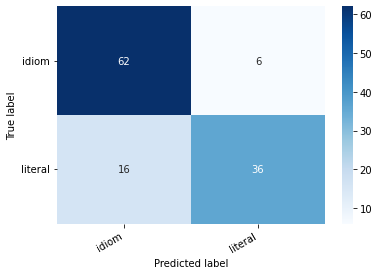

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label');

cm = confusion_matrix(test_data['label_int'], y_pred)
df_cm = pd.DataFrame(cm, index=["idiom","literal"], columns=["idiom","literal"])
show_confusion_matrix(df_cm)